In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


**Import Necessary Libraries**

In [2]:
# extra imports
import seaborn as sns # import for statistical graphics
import matplotlib.pyplot as plt # import module for matlab-like plotting
import plotly.express as px # import module for creating figures at once

# import scikit-learn library for machine learning and predictive data analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

**Dataset Info**

In [3]:
# import dataset https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv
df=pd.read_csv('../input/heart-disease-dataset/heart.csv') # import dataset file

In [4]:
"""""DataFrame Column Names
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: presence of heart disease in the patient. 0 = no disease and 1 = with disease.
"""""
df.head() # show first 5 rows of data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info() # prints info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Exploratory Data Analysis (EDA)**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape 

(1025, 14)

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


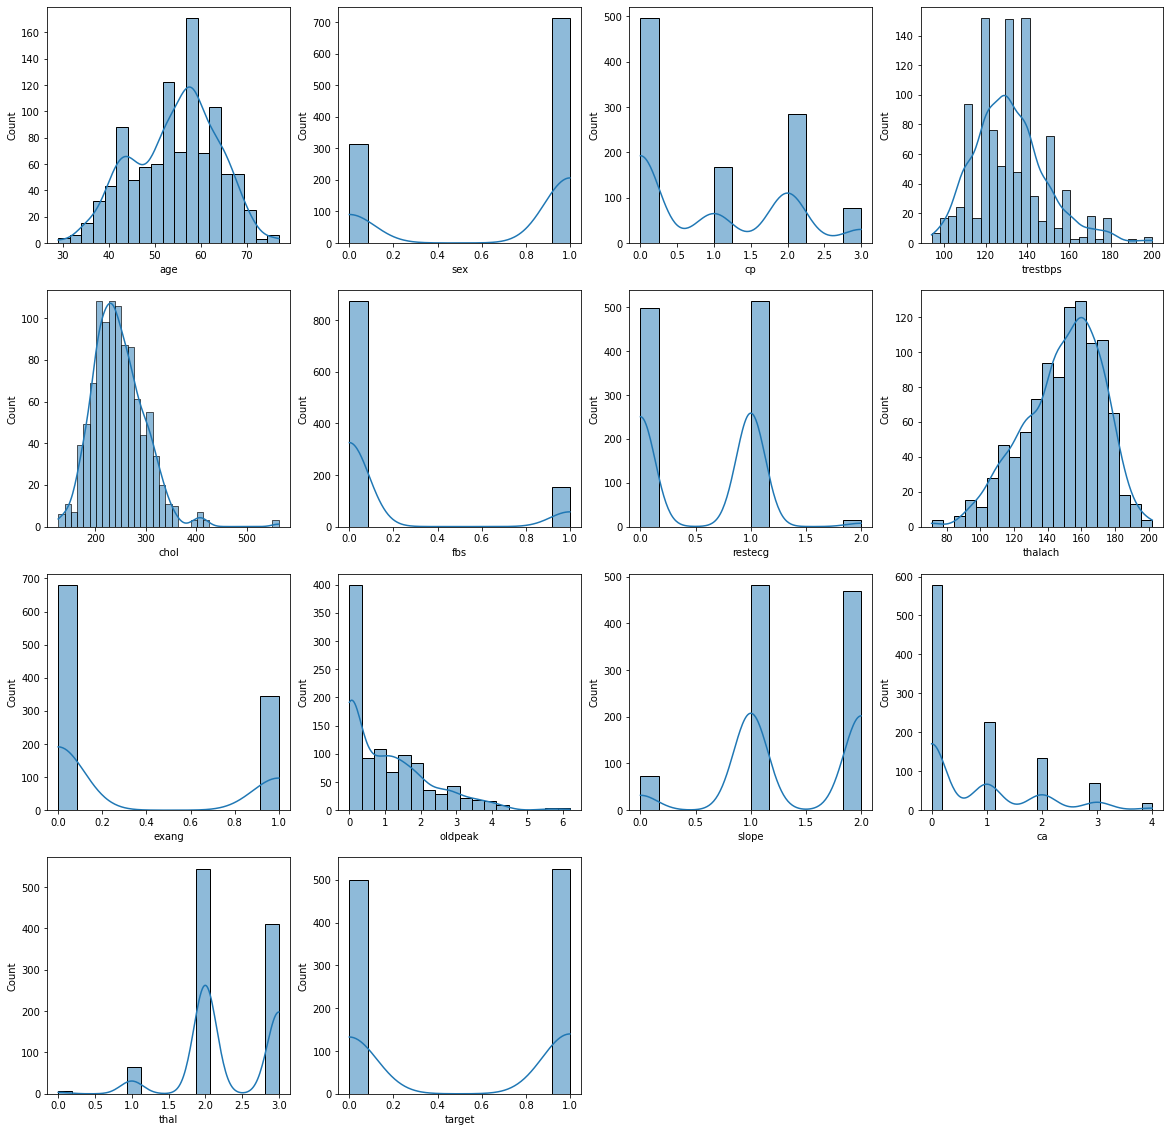

In [9]:
# plot distribution
plt.figure(figsize = (20, 20))
columns = list(df)
subplt = 1
for col in columns:
    if subplt <= len(columns):
        ax = plt.subplot(4, 4, subplt)
        sns.histplot(df[col], kde = True)
        plt.xlabel(col)
    subplt += 1
plt.show()

In [10]:
# identify categorical and numerical columns 
categ_cols = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
numer_cols = ['age', 'tresbps', 'chol', 'thalach', 'oldpeak']

In [11]:
# # plot categorical data
# plt.figure(figsize = (20, 20))
# columns = list(categ_cols)
# subplt = 1
# for col in columns:
#     if subplt <= len(columns):
#         ax = plt.subplot(3, 4, subplt)
#         sns.countplot(x = df[col])
#         plt.xlabel(col)
#     subplt += 1
# plt.show()

In [12]:
# num_df = df.filter(numer_cols)
# fig = px.scatter_matrix(num_df, dimensions = num_df, color = df['target'])
# fig.show()

In [13]:
# # heatmap
# plt.figure(figsize=(20,10)) 
# sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor="white")
# plt.show()

**Creating Model**

In [14]:
# create model
dep_col = 'target' 
ind_col = [col for col in df.columns if col != 'target'] 

x = df[ind_col] 
y = df[dep_col]

rand_seed = 3 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = rand_seed)

**Selecting Classifiers**

In [15]:
knnc = KNeighborsClassifier() 
knnc.fit(x_train, y_train) 
knnc_predicted_train = knnc.predict(x_train) 
knnc_predicted_test = knnc.predict(x_test) 
knnc_train_acc = accuracy_score(y_train, knnc_predicted_train) 
knnc_test_acc = accuracy_score(y_test, knnc_predicted_test) 
knnc_classification_report = classification_report(y_test, knnc_predicted_test)
knnc_confusion_matrix = confusion_matrix(y_test, knnc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {knnc_train_acc}")
print(f"Test phase accuracy: {knnc_test_acc}")
print(f"Classification Report : \n {knnc_classification_report}")
print(f"Confusion Matrix : \n{knnc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, knnc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 0.9207317073170732
Test phase accuracy: 0.751219512195122
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       106
           1       0.74      0.74      0.74        99

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205

Confusion Matrix : 
[[81 25]
 [26 73]]



Predicted,0,1,All
True,,,
0,81,25,106
1,26,73,99
All,107,98,205


In [16]:
dtc = DecisionTreeClassifier() 
dtc.fit(x_train, y_train) 
dtc_predicted_train = dtc.predict(x_train) 
dtc_predicted_test = dtc.predict(x_test) 
dtc_train_acc = accuracy_score(y_train, dtc_predicted_train) 
dtc_test_acc = accuracy_score(y_test, dtc_predicted_test) 
dtc_classification_report = classification_report(y_test, dtc_predicted_test)
dtc_confusion_matrix = confusion_matrix(y_test, dtc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {dtc_train_acc}")
print(f"Test phase accuracy: {dtc_test_acc}")
print(f"Classification Report : \n {dtc_classification_report}")
print(f"Confusion Matrix : \n{dtc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, dtc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 1.0
Test phase accuracy: 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix : 
[[106   0]
 [  0  99]]



Predicted,0,1,All
True,,,
0,106,0,106
1,0,99,99
All,106,99,205


In [17]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
xgb_predicted_train = dtc.predict(x_train) 
xgb_predicted_test = dtc.predict(x_test) 
xgb_train_acc = accuracy_score(y_train, xgb_predicted_train) 
xgb_test_acc = accuracy_score(y_test, xgb_predicted_test) 
xgb_classification_report = classification_report(y_test, xgb_predicted_test)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predicted_test)

print(f"Training phase accuracy: {xgb_train_acc}")
print(f"Test phase accuracy: {xgb_test_acc}")
print(f"Classification Report : \n {xgb_classification_report}")
print(f"Confusion Matrix : \n{xgb_confusion_matrix}\n")
pd.crosstab(y_test, xgb_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 1.0
Test phase accuracy: 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix : 
[[106   0]
 [  0  99]]



Predicted,0,1,All
True,,,
0,106,0,106
1,0,99,99
All,106,99,205


In [18]:
etc = ExtraTreesClassifier() 
etc.fit(x_train, y_train) 
etc_predicted_train = etc.predict(x_train) 
etc_predicted_test = etc.predict(x_test) 
etc_train_acc = accuracy_score(y_train, etc_predicted_train) 
etc_test_acc = accuracy_score(y_test, etc_predicted_test) 
etc_classification_report = classification_report(y_test, etc_predicted_test)
etc_confusion_matrix = confusion_matrix(y_test, etc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {etc_train_acc}")
print(f"Test phase accuracy: {etc_test_acc}")
print(f"Classification Report : \n {etc_classification_report}")
print(f"Confusion Matrix : \n{etc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, etc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)


Training phase accuracy: 1.0
Test phase accuracy: 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix : 
[[106   0]
 [  0  99]]



Predicted,0,1,All
True,,,
0,106,0,106
1,0,99,99
All,106,99,205


In [19]:
classifiers = pd.DataFrame({'Classifier' : [ 'k-NN', 'Decision Tree Classifier', 'Extra Trees Classifier'], 'Accuracy' : [knnc_test_acc, dtc_test_acc, etc_test_acc]})
px.histogram(data_frame = classifiers, x = 'Accuracy', y = 'Classifier', color = 'Accuracy', title = 'Classifier Comparison')

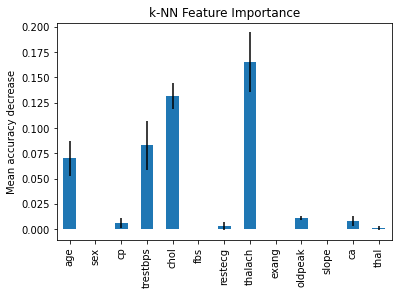

In [20]:
# Significant Columns for k-NN
knnc_result = permutation_importance(knnc, x_test, y_test)
knnc_importances = pd.Series(knnc_result.importances_mean, index=list(x))
fig, ax = plt.subplots()
knnc_importances.plot.bar(yerr=knnc_result.importances_std, ax=ax)
ax.set_title("k-NN Feature Importance")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

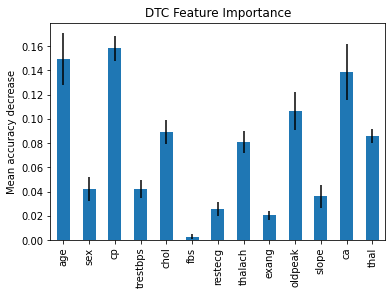

In [21]:
# Significant Columns for DTC
dtc_result = permutation_importance(dtc, x_test, y_test)
dtc_importances = pd.Series(dtc_result.importances_mean, index=list(x) )
fig, ax = plt.subplots()
dtc_importances.plot.bar(yerr=dtc_result.importances_std, ax=ax)
ax.set_title("DTC Feature Importance")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

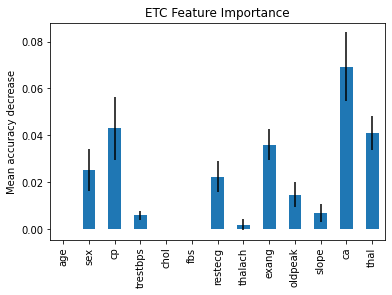

In [22]:
# Significant Columns for ETC
etc_result = permutation_importance(etc, x_test, y_test)
etc_importances = pd.Series(etc_result.importances_mean, index=list(x))
fig, ax = plt.subplots()
etc_importances.plot.bar(yerr=etc_result.importances_std, ax=ax)
ax.set_title("ETC Feature Importance")
ax.set_ylabel("Mean accuracy decrease")
plt.show()